# SMOTE - for imbalanced datasets
The Imbalanced-Learn library (e.g. SMOTE)requires the data to be in numeric format, as it statistical calculations are performed on these

## Import libraries

In [27]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from imblearn.over_sampling import SMOTENC

## Import dataset

In [28]:
bank_file = "./bank-additional-full-cleaned.csv"
df = pd.read_csv(bank_file, sep=';',)

In [42]:
# get basic details of df (num records, num features)
df.shape
df.head()
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [43]:
#convert strings to cats
df['job'] = pd.Categorical(df.job)
df['marital'] = pd.Categorical(df.marital)
df['education'] = pd.Categorical(df.education)
df['default'] = pd.Categorical(df.default)
df['housing'] = pd.Categorical(df.housing)
df['loan'] = pd.Categorical(df.loan)
df['contact'] = pd.Categorical(df.contact)
df['month'] = pd.Categorical(df.month)
df['day_of_week'] = pd.Categorical(df.day_of_week)
df['poutcome'] = pd.Categorical(df.poutcome)


In [44]:
df['y'].value_counts() # dataset is imbalanced with majority of class label as "no".

no     26629
yes     3859
Name: y, dtype: int64

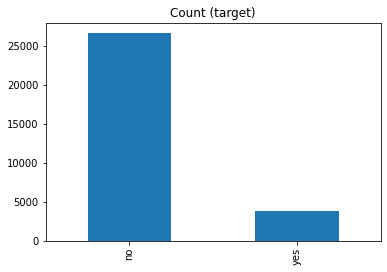

In [45]:
#print bar chart
df.y.value_counts().plot(kind='bar', title='Count (target)');

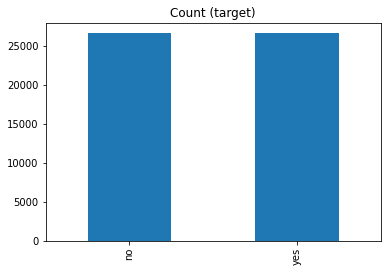

In [48]:
#Over sampling the minority call y=0 using SMOTE
df_new = df

x = df.loc[:, df.columns != 'y']
y = df.y

smotenc = SMOTENC([1,2,3,4,5,6,7,8,9,14],random_state = 101)
x_sample, y_sample = smotenc.fit_resample(x, y)
x_sample['y'] = y_sample
x_sample.to_csv('bank-additional-full-cleaned-smote.csv', sep=';', index=False)

bank_file = "./bank-additional-full-cleaned-smote.csv"
df_smote = pd.read_csv(bank_file, sep=';',)#

# check count now
df_smote['y'].value_counts() # dataset is imbalanced with majority of class label as "no".

#print bar chart
df_smote.y.value_counts().plot(kind='bar', title='Count (target)');